### Pytorchで線形モデルのSGD

In [2]:
import torch as tc
from torch import nn
from torch import optim

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        return self.fc(x)

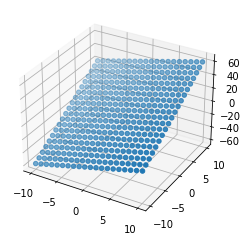

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mesh = tc.meshgrid(
    tc.linspace(-10, 10, 20),
    tc.linspace(-10, 10, 20)
)

def f(x, y):
    return 2 * x + 4 * y + 1

z = f(*mesh)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*mesh, z)

In [5]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [6]:
input_ = tc.stack((mesh[0].flatten(), mesh[1].flatten()), dim=1)
z_ = z.flatten()

In [12]:
for i in range(10000):
    optimizer.zero_grad()
    pred = net(input_)
    loss = criterion(pred.squeeze(1), z_)
    loss.backward()
    optimizer.step()

In [13]:
pred_z = net(input_).view(mesh[0].shape).detach().numpy()

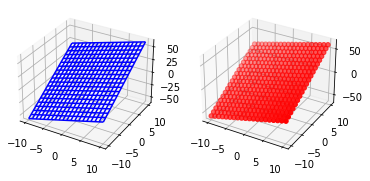

In [17]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(*mesh, z, color='b')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(*mesh, pred_z, color='r')